In [191]:
#Conversion for scaling

MeV = 1 
GeV = 1000*MeV
fm  = 1
c   = 1
metres = (10**15)*fm
km = 1000*metres
second = 2.99*(10**8)*metres
kg = (second**2)/((1.6*(10**(-13)))*((metres)**2))
G = 6.67*10**(-11)*((metres)**3)/(kg*(second)**2)

In [192]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint
from scipy.optimize import minimize
import math 


In [193]:
#Constants
mbar = 1.66*(10**-27)*kg
pi = math.pi

#Defining the values in terms
Rs = ((2*G*(1.98847*(10**30)*kg))/((c**2)))
K1 =  ((4*pi*(Rs**3))/(1.98847*((10**30)*kg)*(c**2)))*(GeV/(fm)**3)

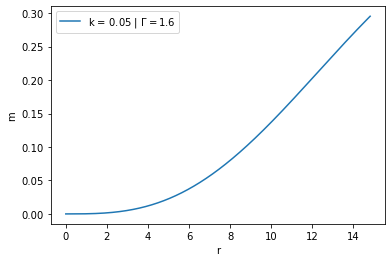

In [194]:
#Class

class TOV_Solver:

    def __init__(self,kappa,GA):
        self.GA = GA
        self.kappa = kappa
        
    def compute_mr(self):
        GA = self.GA
        kappa = self.kappa
        #self.kappa = kappa

        k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))

        def f(x,P):
                k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))
                m,r = x
                d = (mbar*((P*(GeV))/k)**(1/GA) + (P*(GeV))/(GA - 1))/(GeV)
                dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
                drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
                return [dmdp , drdp]

                #Initials - Pc and dp in natural units 
                import math 
                pi = math.pi

        def R0(Pc,dp):
                    k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))
                    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
                    #print(dc)
                    P = Pc - dp 
                    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
                    nc = (((Pc*GeV)/k)**(1/GA))/GeV
                    n = (((P*GeV)/k)**(1/GA))/GeV
                    return  (((3/(2*pi*(3*Pc + dc)))*((math.log((dc + Pc)*n) - ((math.log((d + P)*nc)))))))**(0.5)
                
        def M0(Pc,dp):
                    k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))
                    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
                    P = Pc - dp
                    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
                    nc = (((Pc*GeV)/k)**(1/GA))/GeV
                    n = (((P*GeV)/k)**(1/GA))/GeV
                    return ((((((math.log((dc + Pc)*n) -((math.log((d + P)*nc)))))*(2*dc/(3*Pc + dc))))))*R0(Pc,dp)
                  
                #Initials
        dp =1e-12
        Ro =  R0(Pc = 0.01/GeV,  dp = dp)
        Mo =  M0(Pc = 0.01/GeV,  dp = dp)
        x0 = [Mo,Ro]
                    
        #P0 = Pc- dp
        P0 = 0.01/GeV - dp
                            
                            
        P = np.linspace(1e-6, P0, 100000)
                            
        solve = odeint(f,x0, P[::-1])
                            
        m =solve[:,0]
        r = solve[:,1]
                    
            #Plotting        
        plot.plot(r, m , label = f"k = {kappa} | $\Gamma = {GA}$") 
        plot.xlabel("r")
        plot.ylabel("m")
        plot.legend()
        
    
        

A = TOV_Solver(kappa = 0.05, GA= 1.6)
A.compute_mr()


C:\Users\Abhimkul\AppData\Local\Temp/ipykernel_15676/911795326.py:15: RuntimeWarning: invalid value encountered in double_scalars
  dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
C:\Users\Abhimkul\AppData\Local\Temp/ipykernel_15676/911795326.py:16: RuntimeWarning: invalid value encountered in double_scalars
  drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
c:\Users\Abhimkul\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


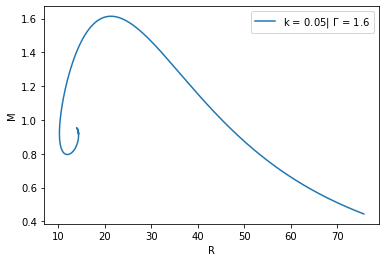

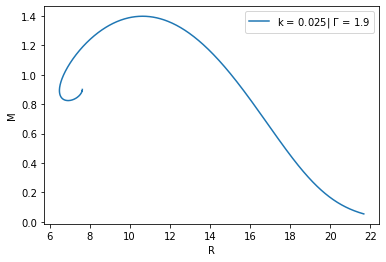

In [195]:
class TOV_Solver:
    def __init__(self,kappa,GA):
        self.GA = GA
        self.kappa = kappa
        

    def compute_MR(self):
        GA = self.GA
        kappa = self.kappa
        k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))

        def f(x,P):
                m,r = x
                d = (mbar*((P*(GeV))/k)**(1/GA) + (P*(GeV))/(GA - 1))/(GeV)
                dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
                drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
                return [dmdp , drdp]

                #Initials - Pc and dp in natural units 
                import math 
                pi = math.pi

        def R0(Pc,dp):
                    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
                    #print(dc)
                    P = Pc - dp 
                    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
                    nc = (((Pc*GeV)/k)**(1/GA))/GeV
                    n = (((P*GeV)/k)**(1/GA))/GeV
                    return  (((3/(2*pi*(3*Pc + dc)))*((math.log((dc + Pc)*n) - ((math.log((d + P)*nc)))))))**(0.5)
                
        def M0(Pc,dp):
                    dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
                    P = Pc - dp
                    d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
                    nc = (((Pc*GeV)/k)**(1/GA))/GeV
                    n = (((P*GeV)/k)**(1/GA))/GeV
                    return ((((((math.log((dc + Pc)*n) -((math.log((d + P)*nc)))))*(2*dc/(3*Pc + dc))))))*R0(Pc,dp)
                  
        #Initials
        Pc = np.logspace(-2,6,1000)
        M = []
        R = []
        dp = 10**-12
        for i in Pc:
    
            #Initials
            Ro =  R0(Pc = i/GeV,  dp = dp)
            Mo =  M0(Pc = i/GeV,  dp = dp)
            x0 = [Mo,Ro]

            #P0 = Pc- dp
            P0 = i/GeV - dp
            #print(P0)
            P = np.linspace(1e-12, P0, 1000)

            solve = odeint(f,x0, P[::-1])

            m =solve[:,0]
            r = solve[:,1]

            M.append(m[-1])
            R.append(r[-1]*Rs/km)  
            
            
        plot.plot(R,M, label = f"k = {kappa}| $\Gamma$ = {GA}")
        plot.legend()
        plot.xlabel("R")
        plot.ylabel("M")   
        plot.show()    
            
    
        

A = TOV_Solver(kappa = 0.05, GA = 1.6)
B = TOV_Solver(kappa = 0.025, GA = 1.9)
A.compute_MR()
B.compute_MR()
plot.show()

In [198]:
dp = 10**-12

class TOV_Solver:
 def __init__(self,Pc):
        self.Pc = Pc
        
        
 def compute_MR_from_Pc(self):
    Pc= self.Pc
    GA = 5/3
    kappa = 0.05
    k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))

    def f(x,P):
        m,r = x
        d = (mbar*((P*(GeV))/k)**(1/GA) + (P*(GeV))/(GA - 1))/(GeV)
        dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
        drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
        return [dmdp , drdp]

        #Initials - Pc and dp in natural units 
        
    
        R = []
        M = []
        
        #Pc = _Pc[0]
    def R0(Pc,dp):
        dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
                    
        P = Pc - dp 
        d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
        nc = (((Pc*GeV)/k)**(1/GA))/GeV
        n = (((P*GeV)/k)**(1/GA))/GeV
        return  (((3/(2*pi*(3*Pc + dc)))*((math.log((dc + Pc)*n) - ((math.log((d + P)*nc)))))))**(0.5)
                
    def M0(Pc,dp):
        dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
        P = Pc - dp
        d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
        nc = (((Pc*GeV)/k)**(1/GA))/GeV
        n = (((P*GeV)/k)**(1/GA))/GeV
        return ((((((math.log((dc + Pc)*n) -((math.log((d + P)*nc)))))*(2*dc/(3*Pc + dc))))))*R0(Pc,dp)
            
    Ro =  R0(Pc = Pc/GeV,  dp = dp)
    Mo =  M0(Pc = Pc/GeV,  dp = dp)
    x_i = [Mo,Ro]

        #P0 = Pc- dp
    P0 = Pc/GeV - dp
        #print(P0)
    P = np.linspace(1e-12, P0, 1000)

    solve = odeint(f,x_i, P[::-1])

    m = solve[:,0]
    r = solve[:,1]
    
    M = (m[-1])
    R = (r[-1])*(Rs/km)
    return f"M: {M} Mo , R: {R} km"
    
A = TOV_Solver(Pc = 1000)
A.compute_MR_from_Pc()

'M: 1.397030319841758 Mo , R: 11.89741349469379 km'

In [201]:
dp = 10**-12

class TOV_Solver:
  def __init__(self,kappa,GA):
     self.kappa = kappa
     self.GA = GA
         
  def compute_Mmax(self):
      GA = self.GA
      kappa = self.kappa
      k = kappa*(mbar)*((0.1*(fm)**-3)**(1 - GA))


      def R0(Pc,dp):
        dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
        P = Pc - dp 
        d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
        nc = (((Pc*GeV)/k)**(1/GA))/GeV
        n = (((P*GeV)/k)**(1/GA))/GeV
        return  (((3/(2*pi*(3*Pc + dc)))*((math.log((dc + Pc)*n) - ((math.log((d + P)*nc)))))))**(0.5)
                
      def M0(Pc,dp):
        dc = (mbar*(Pc*(GeV)/k)**(1/GA) + (Pc*(GeV)/(GA - 1)))/(GeV)
        P = Pc - dp
        d = (mbar*(P*GeV/k)**(1/GA) +(P*GeV/(GA - 1)))/GeV
        nc = (((Pc*GeV)/k)**(1/GA))/GeV
        n = (((P*GeV)/k)**(1/GA))/GeV
        return ((((((math.log((dc + Pc)*n) -((math.log((d + P)*nc)))))*(2*dc/(3*Pc + dc))))))*R0(Pc,dp)
      
      def f(x,P):
        m,r = x
        d = (mbar*((P*(GeV))/k)**(1/GA) + (P*(GeV))/(GA - 1))/(GeV)
        dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
        drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
        return [dmdp , drdp]
                           
      def f1(_Pc):
        Pc = _Pc[0]
        Ro =  R0(Pc = Pc/GeV,  dp = dp)
        Mo =  M0(Pc = Pc/GeV,  dp = dp) 
        x_i = [Mo,Ro]
            
        #P0 = Pc- dp
        P0 = Pc/GeV - dp
        
        P = np.linspace(1e-12, P0, 1000)
            
        solve = odeint(f,x_i, P[::-1])
            
        m = solve[:,0]
        r = solve[:,1]
            
        M = (m[-1])
        return -M
        #R = (r[-1])*(Rs/km)
      
      def minima(x0):
        result = minimize(f1 , x0, method='Nelder-Mead')
        return result.fun
      
      return f"Mmax : {-minima(10)}"

A = TOV_Solver(kappa = 0.05, GA = 5/3)
A.compute_Mmax()


'Mmax : 1.6932052795493822'